## Airline On-Time Arrivals

Flight delays can be very frustrating to passengers and costly to airline companies. Flight delays are not easy to understand as they arise from multiple reasons like increase in air traffic at the origin or destination airport, weather etc. The on-time performance data of airline schedules could be useful to shed some light into causes of flight delays.

The goal of this project is to construct a flight delay prediction model leveraging flight On-Time performance data and use the model for deriving insights about past flight delays. The on-time arrival data for non-stop domestic flights from US Department of Transportation(DoT) was used for this analysis.

Essentially, my modeling approach involves using traditional & popular machine learning algorithms like Logistic Regression, Decision trees & Random Forest to predict airline delays This notebook contains sections for dataset exploration, data cleansing, deriving insights from visualizations, training and evaluation of classification models, and model interpretation. Common model evaluation metrics like sensitivity, specificity, ROC curves and accuracy scores were used for model evaluation.



### Data Handling

In [107]:
# Importing libraries necessary for this analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
# Loading csv file into a dataframe
df = pd.read_csv("On_Time_On_Time_Performance_2016_1.csv")

/home/anusha/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
df.head(3)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# total number of rows and columns in the dataset
df.shape

(445827, 110)

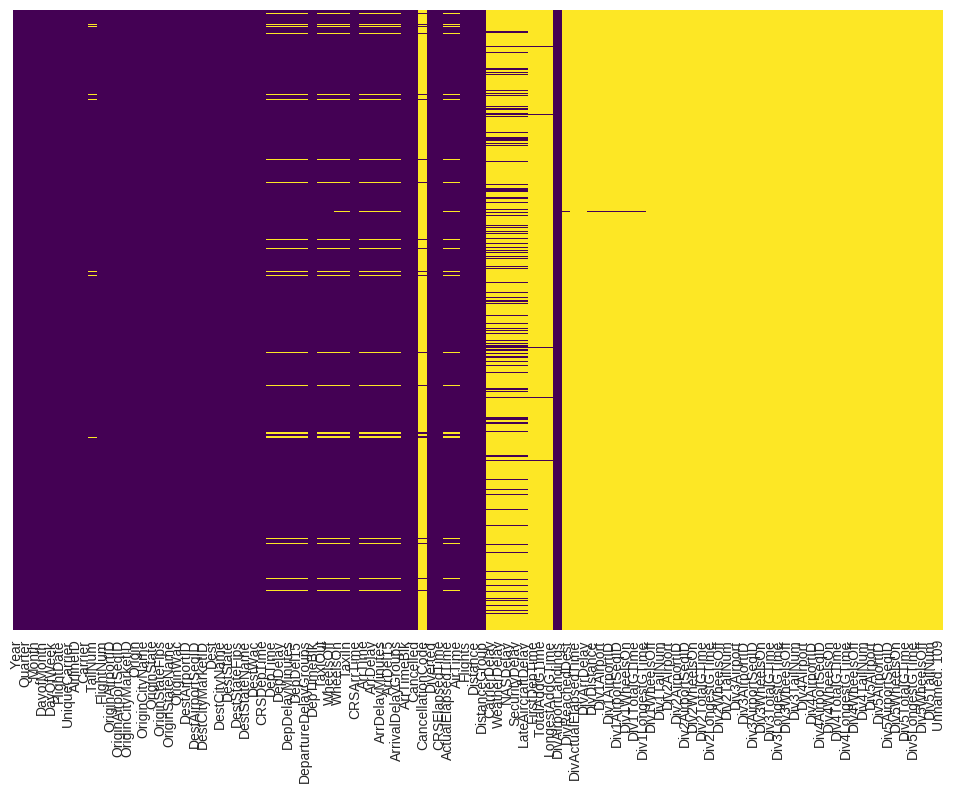

In [111]:
# To identify missing records in the dataset
# Yellow - missing values
plt.figure(figsize = (12, 8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The columns that were not used in this analysis were removed from the original dataframe

In [112]:
# Dropping columns that have more than 2/3 of missing entries
for i in df.columns:
    if df[i].isnull().sum() > 300000:
        df.drop(i, axis = 1, inplace = True)

In [113]:
# Dropping columns that do not provide useful information for this analysis
for i in df.columns:
    if df[i].nunique() == 1:
        df.drop(i, axis = 1, inplace = True)

In [114]:
# Total number of rows and columns after deleting columns with 2/3 of missing values and no useful information
df.shape

(445827, 52)

In [115]:
df.columns

Index(['DayofMonth', 'DayOfWeek', 'FlightDate', 'UniqueCarrier', 'AirlineID',
       'Carrier', 'TailNum', 'FlightNum', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime',
       'AirTime', 'Distance', 'DistanceGroup', 'DivAirportLandings'],
      dtype='object')

### Exploratory Analysis

The exploratory analysis was done to identify the features that look promising in the analysis to predict flight arrival delays. Our target variable is ArrDel15 - Arrival Delay Indicator, 15 Minutes or More (1=Yes)

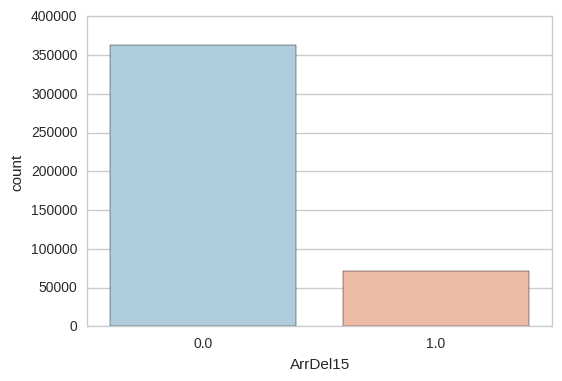

In [116]:
sns.set_style('whitegrid')
sns.countplot(x='ArrDel15',data=df,palette='RdBu_r')

In [117]:
df.ArrDel15.value_counts()

0.0    362416
1.0     70882
Name: ArrDel15, dtype: int64

In [118]:
print ("ratio = ", str( (70882*1.0) / (362416+70882) ))

ratio =  0.16358718480122225


The dataset is very highly asymmetric, with positive arrival delays only making up 16% of the samples. This means that a classifier that predicts that there is no arrival delay has an accuracy of 84%.

The variable called cols was created to store the continuous variables that will be used in this analysis

In [119]:
cols =  ['TaxiOut','TaxiIn', 'AirTime', 'Distance']

The following plots were made to explore the categorical variables in the dataset to predict arrival delays

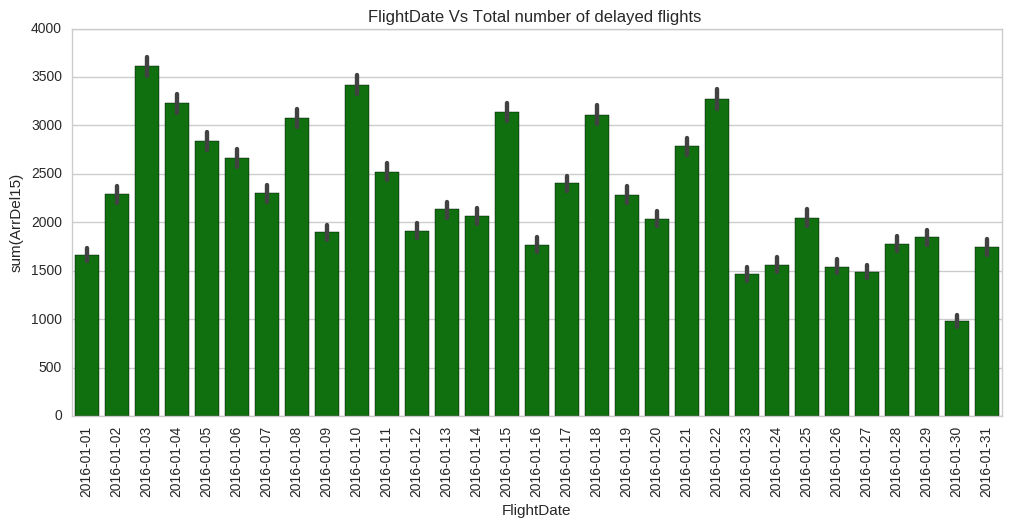

In [120]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(df['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDel15', data=df, color = "green" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Total number of delayed flights ")

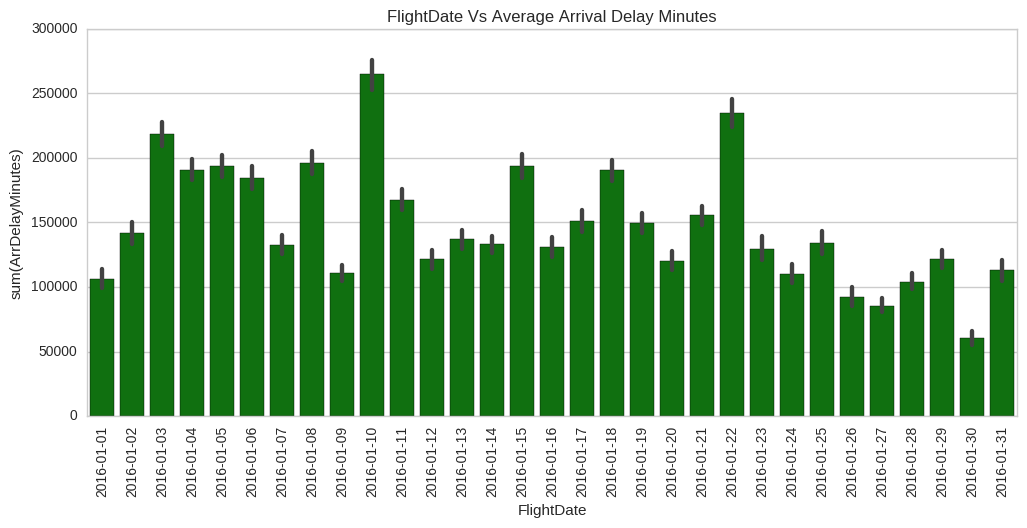

In [121]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(df['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDelayMinutes', data=df, color = "green" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Average Arrival Delay Minutes")

The total number of delays and average delay per day seems to follow a common pattern except on 01/03 when a large number of flights seems to have been delayed by smaller times when compared to other days. Looking up this date, 01/03 falls on a Sunday right after New year long week end and naturally has different traffic pattern when compared to other days

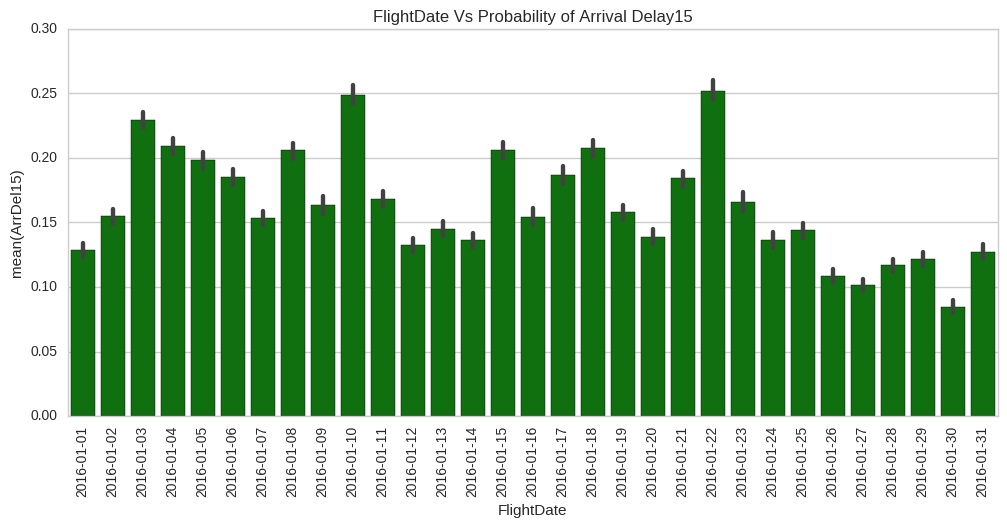

In [122]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(df['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDel15', data=df, color = "green" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Probability of Arrival Delay15")

25% of all Flights seems to have been delayed on 01/10 and 01/22

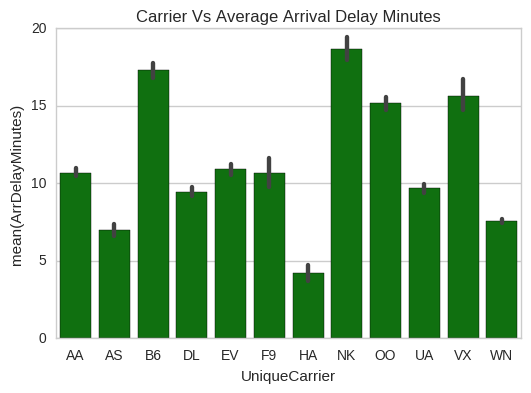

In [123]:
sns.set_style('whitegrid')
carrier_order = np.unique(list(df['UniqueCarrier']))
sns.barplot(x='UniqueCarrier',y ='ArrDelayMinutes', data=df, color = "green" , order = carrier_order)
fig = plt.title("Carrier Vs Average Arrival Delay Minutes")

The carriers B6 and NK seem to have longer arrival delays

In [124]:
carrier_grouped = df.groupby('UniqueCarrier').mean()

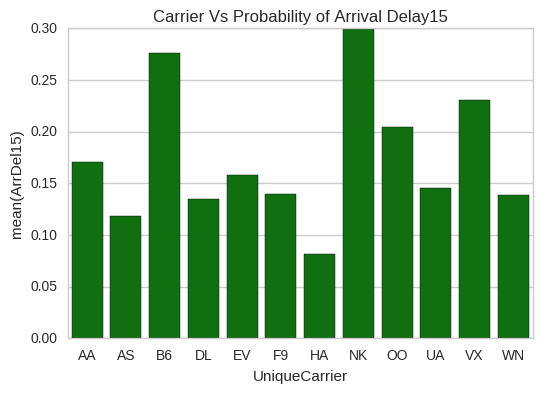

In [125]:
sns.set_style('whitegrid')
sns.barplot(x=carrier_grouped.index, y ="ArrDel15", data=carrier_grouped, color ='green')
fig = plt.title("Carrier Vs Probability of Arrival Delay15")

The carriers B6 and NK seem to have higher number of flight arrival delays

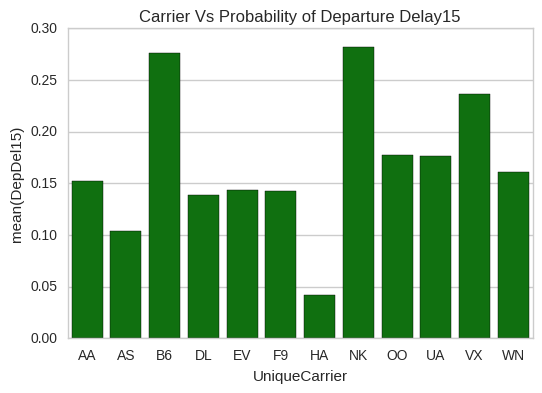

In [126]:
sns.set_style('whitegrid')
sns.barplot(x=carrier_grouped.index, y ="DepDel15", data=carrier_grouped, color ='green')
fig = plt.title("Carrier Vs Probability of Departure Delay15")

The carriers B6 and NK seem to have higher number of flight departure delays

The function below converts the month column into 5 weeks to determine when do flight delays occur more often, whether towards the end of the month or staring of the month

In [127]:
# Splitting month column into 5 weeks
def Impute_month(cols):
    if cols in [1,2,3,4,5,6,7]:
        return "weekI"

    elif cols in [8,9,10,11,12,13,14]:
        return "weekII"

    elif cols in [15,16,17,18,19,20,21]:
        return "weekIII"

    elif cols in [22,23,24,25,26,27,28]:
        return "weekIV"

    else:
        return "weekV"
    
df['Month'] = df["DayofMonth"].apply(Impute_month)
df.drop("DayofMonth", axis = 1, inplace = True)

The function below converts the week column into weekdays to identify whether flight delays occur on weekends or during weekdays

In [128]:
# Splitting week column into weekend and weekdays
def Impute_week(cols):
    if cols in [1,7]:
        return "Weekend"

    else:
        return "Weekdays"
    
    
df['Week'] = df["DayOfWeek"].apply(Impute_week)
df.drop("DayOfWeek", axis = 1, inplace = True)

In [129]:
Month_grouped1 = df.groupby('Month')["ArrDel15"].sum()
Month_grouped2 = df.groupby('Month')["ArrDel15"].count()
Month_grouped = pd.concat([Month_grouped1, Month_grouped2],axis=1, keys=["sum", "count"])
Month_grouped["Average number of delays"] = Month_grouped["sum"]/Month_grouped["count"]

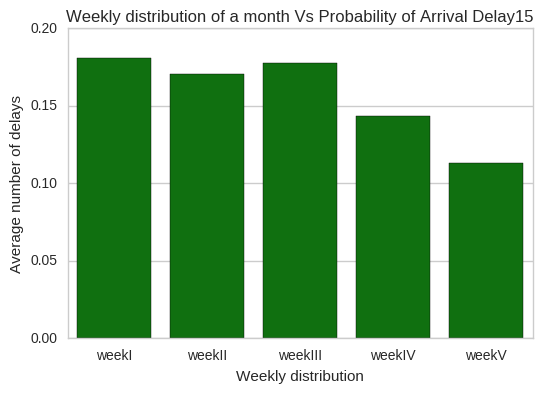

In [130]:
sns.set_style('whitegrid')
sns.barplot(x=Month_grouped.index, y ='Average number of delays', data=Month_grouped, color ='green')
plt.xlabel("Weekly distribution")
plt.ylabel("Average number of delays")
fig = plt.title("Weekly distribution of a month Vs Probability of Arrival Delay15")

The average number of delays appear to decrease towards the end of the month

In [131]:
week_grouped1 = df.groupby('Week')["ArrDel15"].sum()
week_grouped2 = df.groupby('Week')["ArrDel15"].count()
week_grouped = pd.concat([week_grouped1, week_grouped2],axis=1, keys=["sum", "count"])
week_grouped["Probability of Arrival Delay15"] = week_grouped["sum"]/week_grouped["count"]

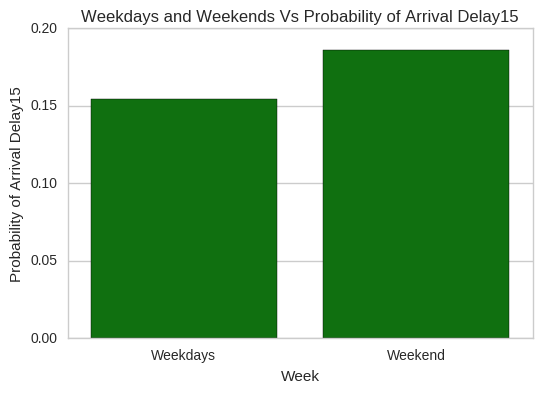

In [132]:
sns.set_style('whitegrid')
sns.barplot(x=week_grouped.index, y ='Probability of Arrival Delay15', data=week_grouped, color ='green')
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Weekdays and Weekends Vs Probability of Arrival Delay15")

The average number of delays are less during weekdays compared to the weekend

In [133]:
airport_grouped1 = df.groupby('Origin')["ArrDel15"].sum()
airport_grouped2 = df.groupby('Origin')["ArrDel15"].count()
airport_grouped = pd.concat([airport_grouped1, airport_grouped2],axis=1, keys=["sum", "count"])
airport_grouped["Probability of Arrival Delay15"] = airport_grouped["sum"]/airport_grouped["count"]
airport_grouped.sort_values(by = "Probability of Arrival Delay15", ascending = False, inplace = True)

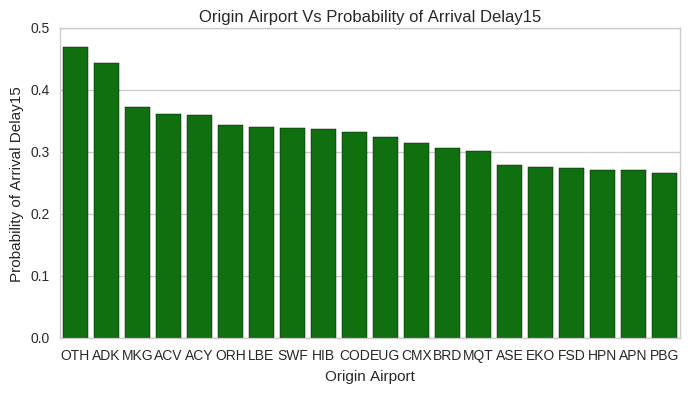

In [134]:
plt.figure(figsize = (8, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped.index[:20], y = "Probability of Arrival Delay15", data=airport_grouped[:20], color ='green')
plt.xlabel("Origin Airport")
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Origin Airport Vs Probability of Arrival Delay15")

In [135]:
airport_grouped3 = df.groupby('Dest')["ArrDel15"].sum()
airport_grouped4 = df.groupby('Dest')["ArrDel15"].count()
airport_grouped_dest = pd.concat([airport_grouped3, airport_grouped4],axis=1, keys=["sum", "count"])
airport_grouped_dest["Probability of Arrival Delay15"] = airport_grouped_dest["sum"]/airport_grouped_dest["count"]
airport_grouped_dest.sort_values(by = "Probability of Arrival Delay15", ascending = False, inplace = True)

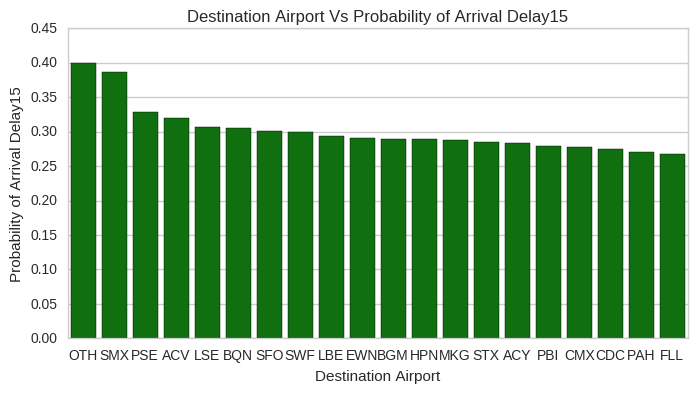

In [136]:
plt.figure(figsize = (8, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped_dest.index[:20], y ='Probability of Arrival Delay15', data=airport_grouped_dest[:20], color ='green')
plt.xlabel("Destination Airport")
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Destination Airport Vs Probability of Arrival Delay15")

The Southwest Oregon Regional Airport (OTH) is the busiest airport with higher number of arrival delays

A new column called flight route was created with origin airport and destination airport

In [137]:
df["Flight_route"] = df["Origin"] + " to " + df["Dest"]
flightroute = df.groupby('Flight_route').sum()
flightroute.sort_values(by = "ArrDel15", axis = 0, ascending = False, inplace = True)

In [138]:
df["Flight_route"].nunique()

3995

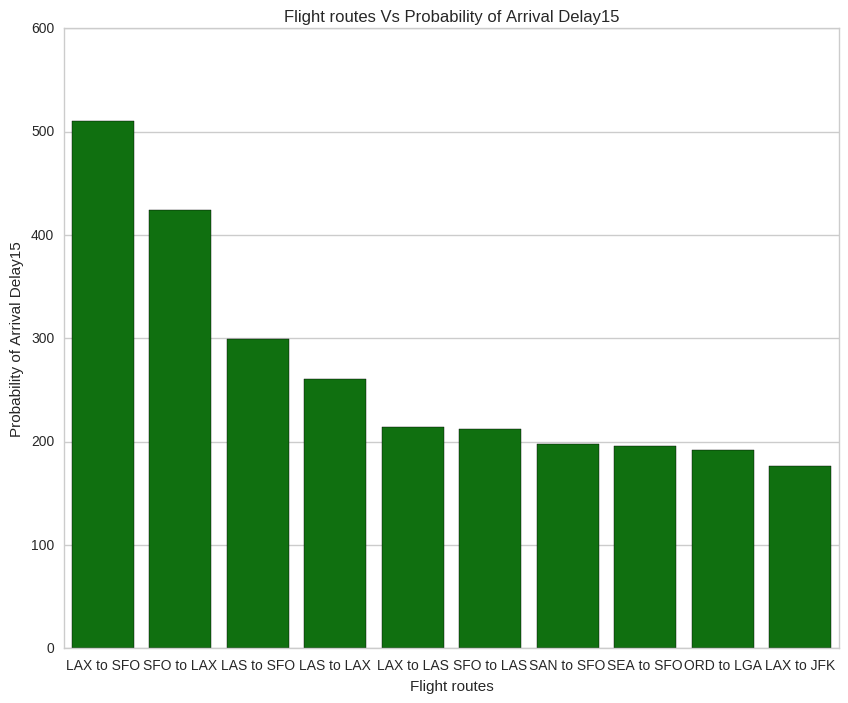

In [139]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
fig = sns.barplot(x=flightroute.index[:10], y = "ArrDel15", data=flightroute[:10], color ='green')
fig.set(xlabel = 'Flight routes', ylabel = 'Probability of Arrival Delay15')
fig = plt.title("Flight routes Vs Probability of Arrival Delay15")

The plot above shows the top 10 flight routes with higher number of arrival delays. So it is important to include distance and airtime columns in this analysis to determine whether they play a major role in predicting flight arrivals

In [140]:
# Splitting Departure time and Arrival time columns into 3 categories : Morning, Afternoon, Evening
def impute_time(cols):
    if cols >= 600 and cols < 1200:
        return "Morning"
    elif cols >= 1200 and cols < 1600:
        return "Afternoon"
    else:
        return "Evening"
    
    
df['Arrival_Time'] = df["CRSArrTime"].apply(impute_time)
df.drop("CRSArrTime", axis = 1, inplace = True)

In [141]:
df['Departure_Time'] = df["CRSDepTime"].apply(impute_time)
df.drop("CRSDepTime", axis = 1, inplace = True)

In [142]:
arrtime_grouped = df.groupby('Arrival_Time').mean()
deptime_grouped = df.groupby('Departure_Time').mean()

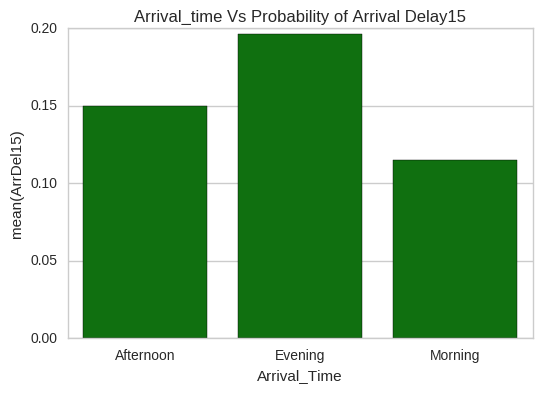

In [143]:
sns.set_style('whitegrid')
sns.barplot(x=arrtime_grouped.index, y ="ArrDel15", data=arrtime_grouped, color ='green')
fig = plt.title("Arrival_time Vs Probability of Arrival Delay15")

The departure delays appear to be high in the evenings

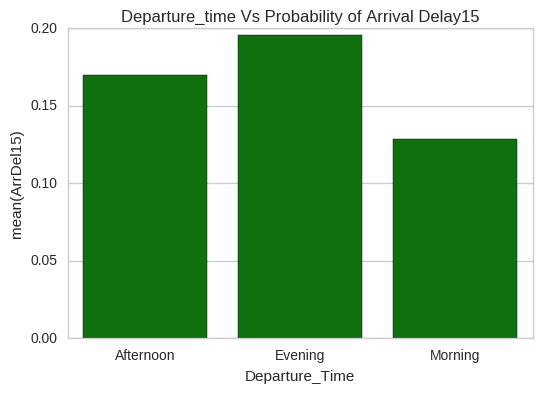

In [144]:
sns.set_style('whitegrid')
sns.barplot(x=deptime_grouped.index, y ="ArrDel15", data=deptime_grouped, color ='green')
fig = plt.title("Departure_time Vs Probability of Arrival Delay15")

The arrival delays appear to be high in the evenings

### Feature Engineering

The columns that do not contain relevant information and columns that contain relevant but redundant information are not included in this analysis

In [145]:
for i in df.columns:
    print (i, df[i].nunique())

FlightDate 31
UniqueCarrier 12
AirlineID 12
Carrier 12
TailNum 4238
FlightNum 6659
OriginAirportID 294
OriginAirportSeqID 294
OriginCityMarketID 273
Origin 294
OriginCityName 290
OriginState 52
OriginStateFips 52
OriginStateName 52
OriginWac 52
DestAirportID 294
DestAirportSeqID 294
DestCityMarketID 273
Dest 294
DestCityName 290
DestState 52
DestStateFips 52
DestStateName 52
DestWac 52
DepTime 1418
DepDelay 714
DepDelayMinutes 671
DepDel15 2
DepartureDelayGroups 15
DepTimeBlk 19
TaxiOut 151
WheelsOff 1426
WheelsOn 1440
TaxiIn 122
ArrTime 1440
ArrDelay 735
ArrDelayMinutes 660
ArrDel15 2
ArrivalDelayGroups 15
ArrTimeBlk 19
Cancelled 2
Diverted 2
CRSElapsedTime 448
ActualElapsedTime 637
AirTime 613
Distance 1246
DistanceGroup 11
DivAirportLandings 4
Month 5
Week 2
Flight_route 3995
Arrival_Time 3
Departure_Time 3


In [146]:
# dropping columns which do not hold any useful data and columns that contain repeated information
df_clean = df.drop(['FlightDate', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff',
       'WheelsOn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime',
       'DistanceGroup', 'DivAirportLandings', 'Flight_route', 'Departure_Time'], axis = 1)

In [147]:
df_clean.shape

(445827, 10)

In [148]:
df_clean.isnull().sum()

UniqueCarrier        0
Origin               0
TaxiOut          11600
TaxiIn           11907
ArrDel15         12529
AirTime          12529
Distance             0
Month                0
Week                 0
Arrival_Time         0
dtype: int64

In [149]:
# Dropping missing records
df_clean.dropna(axis = 0, inplace = True)

Upto 3% of values are missing in some of the columns. Hence the missing rows were dropped from the analysis instead of imputing these columns with its respective most frequent value

In [150]:
df_clean.isnull().sum()

UniqueCarrier    0
Origin           0
TaxiOut          0
TaxiIn           0
ArrDel15         0
AirTime          0
Distance         0
Month            0
Week             0
Arrival_Time     0
dtype: int64

In [151]:
check_cor = df_clean[cols]

The function below checks for correlations between independent variables in the dataset as running multiple regression with highly correlated variables would give inaccurate results

In [152]:
# Calculating correlations between independent variables
print("Correlation Matrix")
print(check_cor.corr())
print("##############")

def get_pairs(df):
    ## Get diagonal and lower triangular pairs of correlation matrix
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    cal_corr = df.corr().abs().unstack()
    labels_to_drop = get_pairs(df)
    cal_corr = cal_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return cal_corr[0:n]
 
print("Top Absolute Correlations")
print(get_top_abs_correlations(check_cor, 2))

Correlation Matrix
           TaxiOut    TaxiIn   AirTime  Distance
TaxiOut   1.000000  0.007479  0.049890  0.037180
TaxiIn    0.007479  1.000000  0.101871  0.096430
AirTime   0.049890  0.101871  1.000000  0.982208
Distance  0.037180  0.096430  0.982208  1.000000
##############
Top Absolute Correlations
AirTime  Distance    0.982208
TaxiIn   AirTime     0.101871
dtype: float64


There is high correlation between distance and airtime, hence dropping the column airtime from the analysis

In [153]:
df_clean.drop(["AirTime"], axis = 1, inplace = True)

In [154]:
df_clean.columns

Index(['UniqueCarrier', 'Origin', 'TaxiOut', 'TaxiIn', 'ArrDel15', 'Distance',
       'Month', 'Week', 'Arrival_Time'],
      dtype='object')

In [155]:
indicator_var = pd.DataFrame()
categories = ['UniqueCarrier', 'Origin', 'Month', 'Week', 'Arrival_Time']

The categorical variables above are transformed into dummy variables using pd.get_dummies and the first category in each column was dropped from the analysis to prevent multicollinearity

In [156]:
for i in categories:
    x = pd.get_dummies(df_clean[i],drop_first=True)
    indicator_var = pd.concat([indicator_var, x],axis=1)

In [157]:
df_clean.drop(['UniqueCarrier', 'Origin','Month', 'Week', "Arrival_Time"], axis = 1, inplace = True)

At this point we completed investigating the entire dataset and worked seperately on continuous and categorical variables. Now, its time to merge both kinds of variables

In [158]:
# The dataframes with categorical and quantitative are concatenated to get the final data frame to run binary classifiers
final_data = pd.concat([indicator_var, df_clean],axis=1)

In [159]:
print ("The final number of rows used in the classification: ", len(final_data)) # Rows Count
print ("The final number of columns used in the classification: ",(final_data.shape[1])) # Columns Count

The final number of rows used in the classification:  433298
The final number of columns used in the classification:  315


In [160]:
features = []
for i in final_data.columns:
    if i != "ArrDel15":
        features.append(i)

In [161]:
len(features)

314

In [162]:
final_data["ArrDel15"].value_counts()

0.0    362416
1.0     70882
Name: ArrDel15, dtype: int64

The baseline accuracy score is thus calculated as ( 27125/(27125+17884)) = 0.16

Classifiers were used to improve the baseline classification accuracy score

GridSearchCV was used over the parameter grid to get the best fit classifier using 5-fold cross validation. The best classifier will be stored in variable Best_parameter

The dataset was split to create a training and test mask.

In [163]:
# Creating a mask column to separate train and test records

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

itrain, itest = train_test_split(range(final_data.shape[0]), train_size=0.7)
mask=np.ones(final_data.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

The function cv_optimize below was used to perform a Grid Search in parameters, and a default of 5-fold cross-validation. It takes arguments as clf which is an instance of a scikit learn classifier, hyper-parameter dictionary parameters, X - features, y - target variable, number of folds n_folds, and custom scoring function score_func. It performs cross-validation using GridSearchCV along with a grid-search of hyperparameters. It obtains the best model by the average cross-validation score

In [164]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_)
    best = gs.best_estimator_
    return best

The function do_classify takes either a mask or a reuse_split dictionary to specify which is the training set and which is the test set in X and y. The mask is used to choose which samples to use as training samples and which ones to use as test samples.

df - dataframe,
featurenames - X variables,
target - y variable,
n_folds - number of cross validation folds, default = 5

The function prints out the accuracy score on the training and test data, and also the confusion matrix associated with this classifier. It returns the best_fit classifier, along with the training and test sets.



In [165]:
def do_classify(clf, parameters, df, featurenames, targetname, target, mask=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=df[featurenames]
    X=subdf.values
    y=(df[targetname].values==target)*1
    if mask !=None:
        #print ("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [166]:
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax


Since final_data dataframe has lots of indicator variables, decision tree and random forest are the intial choice for classifiers. These classifiers were trained by 70% of the dataset and the probability of flight delay in the test set was predicted. Random forests is known to handle high dimensional datasets well. 
Random Forests also allows to determine the important features in predicting Y through a function feature_importances, that can be used for efficient visulaization.


In [167]:
# Doing parameter search on a Decision tree classifier with Gini criterion

from sklearn.tree import DecisionTreeClassifier
clfdt=DecisionTreeClassifier()
parameters = {"max_depth": list(range(1,10,1))}
clfdt, Xtrain, ytrain, Xtest, ytest  = do_classify(clfdt, parameters, final_data, features, 'ArrDel15', 1, mask=mask)

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'max_depth': 1} 0.844537565775 [mean: 0.84454, std: 0.00624, params: {'max_depth': 1}, mean: 0.77698, std: 0.14289, params: {'max_depth': 2}, mean: 0.77704, std: 0.14303, params: {'max_depth': 3}, mean: 0.79317, std: 0.11370, params: {'max_depth': 4}, mean: 0.79790, std: 0.10375, params: {'max_depth': 5}, mean: 0.78728, std: 0.12563, params: {'max_depth': 6}, mean: 0.77866, std: 0.10249, params: {'max_depth': 7}, mean: 0.77135, std: 0.11910, params: {'max_depth': 8}, mean: 0.77229, std: 0.11500, params: {'max_depth': 9}]
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.85
[[106732   1969]
 [ 18031   3258]]
########################################################


In [168]:
# Creating a classification report for this decision tree

from sklearn.metrics import classification_report
print (classification_report(ytest,clfdt.predict(Xtest)))

             precision    recall  f1-score   support

          0       0.86      0.98      0.91    108701
          1       0.62      0.15      0.25     21289

avg / total       0.82      0.85      0.80    129990



In [169]:
# Changing split criterion to entropy and re-running the decision tree

clfdt_entropy = DecisionTreeClassifier()
parameters = {"criterion": ['entropy'],  "max_depth": list(range(1,10,1))}
clfdt_entropy, Xtrain, ytrain, Xtest, ytest  = do_classify(clfdt_entropy, parameters, final_data, features, 'ArrDel15', 1, mask=mask)

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'criterion': 'entropy', 'max_depth': 1} 0.841408733037 [mean: 0.84141, std: 0.00781, params: {'criterion': 'entropy', 'max_depth': 1}, mean: 0.77909, std: 0.13614, params: {'criterion': 'entropy', 'max_depth': 2}, mean: 0.77648, std: 0.14312, params: {'criterion': 'entropy', 'max_depth': 3}, mean: 0.79249, std: 0.11442, params: {'criterion': 'entropy', 'max_depth': 4}, mean: 0.79817, std: 0.10474, params: {'criterion': 'entropy', 'max_depth': 5}, mean: 0.78737, std: 0.12596, params: {'criterion': 'entropy', 'max_depth': 6}, mean: 0.77883, std: 0.10335, params: {'criterion': 'entropy', 'max_depth': 7}, mean: 0.77578, std: 0.10906, params: {'criterion': 'entropy', 'max_depth': 8}, mean: 0.76506, std: 0.11342, params: {'criterion': 'entropy', 'max_depth': 9}]
############# based on standard predict ################
Accuracy on training data: 0.84
Accuracy on test data:     0.84
[[105579   3122]
 [ 17419   3870]]
########################################################


In [170]:
print (classification_report(ytest,clfdt_entropy.predict(Xtest)))

             precision    recall  f1-score   support

          0       0.86      0.97      0.91    108701
          1       0.55      0.18      0.27     21289

avg / total       0.81      0.84      0.81    129990



We get similar performance metrics for both Gini and Entropy split criterion.

The decision tree seems to be doing a good job of identifying the on-time flights as shown by high precision score. The F1 score which is considered as a trade-off of precision and recall is also higher for the on-time flights.



Optimizing Random Forest for number of estimators parameter

In [171]:
# Training a random forest classifier ; Coarse search on parameter - number of estimators

from sklearn.ensemble import RandomForestClassifier
clfForest = RandomForestClassifier()
parameters = {"n_estimators": list(range(20,101,5))}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       final_data, features, 'ArrDel15', 1, mask=mask, 
                                                       n_jobs = 10, score_func='accuracy')

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 30} 0.73465256439 [mean: 0.73089, std: 0.13503, params: {'n_estimators': 20}, mean: 0.72512, std: 0.14091, params: {'n_estimators': 25}, mean: 0.73465, std: 0.13102, params: {'n_estimators': 30}, mean: 0.72959, std: 0.13687, params: {'n_estimators': 35}, mean: 0.73015, std: 0.13734, params: {'n_estimators': 40}, mean: 0.72906, std: 0.13867, params: {'n_estimators': 45}, mean: 0.73040, std: 0.13712, params: {'n_estimators': 50}, mean: 0.72807, std: 0.13965, params: {'n_estimators': 55}, mean: 0.73134, std: 0.13678, params: {'n_estimators': 60}, mean: 0.72686, std: 0.14224, params: {'n_estimators': 65}, mean: 0.72670, std: 0.14331, params: {'n_estimators': 70}, mean: 0.72565, std: 0.14387, params: {'n_estimators': 75}, mean: 0.72822, std: 0.14140, params: {'n_estimators': 80}, mean: 0.72820, std: 0.14119, params: {'n_estimators': 85}, mean: 0.72750, std: 0.14108, params: {'n_estimators': 90}, mean: 0.72720, std: 0.14138, params: {'n_estimators': 95}, mean: 0.72993, 

In [172]:
best_estimator_count = clfForest.get_params()['n_estimators']
print (best_estimator_count)

30


In [173]:
print (classification_report(ytest,clfForest.predict(Xtest)))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91    108701
          1       0.54      0.24      0.33     21289

avg / total       0.81      0.84      0.82    129990



Optimizing Random Forest for max_depth parameter

In [174]:
# Continuing coarse search after additon of max_depth parameter to the search

parameters = {"n_estimators": list(range(best_estimator_count -4, best_estimator_count+4, 3)) , "max_depth" : list(range ( 5, 49 , 5))}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       final_data, features, 'ArrDel15', 1, mask=mask, 
                                                       n_jobs = 10, score_func='accuracy')

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 32, 'max_depth': 5} 0.836492937872 [mean: 0.83646, std: 0.00007, params: {'n_estimators': 26, 'max_depth': 5}, mean: 0.83644, std: 0.00011, params: {'n_estimators': 29, 'max_depth': 5}, mean: 0.83649, std: 0.00001, params: {'n_estimators': 32, 'max_depth': 5}, mean: 0.83391, std: 0.00584, params: {'n_estimators': 26, 'max_depth': 10}, mean: 0.83355, std: 0.00633, params: {'n_estimators': 29, 'max_depth': 10}, mean: 0.83385, std: 0.00559, params: {'n_estimators': 32, 'max_depth': 10}, mean: 0.82223, std: 0.03444, params: {'n_estimators': 26, 'max_depth': 15}, mean: 0.82375, std: 0.03223, params: {'n_estimators': 29, 'max_depth': 15}, mean: 0.81512, std: 0.05185, params: {'n_estimators': 32, 'max_depth': 15}, mean: 0.78792, std: 0.10047, params: {'n_estimators': 26, 'max_depth': 20}, mean: 0.78663, std: 0.10163, params: {'n_estimators': 29, 'max_depth': 20}, mean: 0.78581, std: 0.09836, params: {'n_estimators': 32, 'max_depth': 20}, mean: 0.77417, std: 0.11020, para

In [175]:
best_estimator_count = clfForest.get_params()['n_estimators']
best_max_depth = clfForest.get_params()['max_depth']
print (best_estimator_count, best_max_depth)

32 5


In [176]:
print (classification_report(ytest,clfForest.predict(Xtest)))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91    108701
          1       0.00      0.00      0.00     21289

avg / total       0.70      0.84      0.76    129990



/home/anusha/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The hyperparameter search is now complete for n_estimators and max_depth


The performance of random forest did not improve over Decision tree and like decision tree, random forest did not do a good job of predicting true arrival delays

In [177]:
# Extracting Top 30 significant features from the recent Random forest fit
signi_features = list(zip(features, clfForest.feature_importances_))

In [178]:
signi_features = pd.DataFrame(signi_features, columns = ["features", "importance"])
signi_features.sort(columns = ["importance"], ascending = False, inplace = True)
signi_features[:30]

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,features,importance
311,TaxiOut,0.261647
312,TaxiIn,0.148047
310,Morning,0.109017
1,B6,0.082285
309,Evening,0.075064
6,NK,0.053009
308,Weekend,0.030014
307,weekV,0.029532
10,WN,0.024811
306,weekIV,0.023263


In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
# Doing parameter search on a Logistic Regression classifier
clflog, X_train, y_train, X_test, y_test = do_classify(LogisticRegression(penalty = "l1"), {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, final_data, features, "ArrDel15", 1, mask=mask)

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'C': 0.001} 0.832167301885 [mean: 0.83217, std: 0.03387, params: {'C': 0.001}, mean: 0.79540, std: 0.10704, params: {'C': 0.01}, mean: 0.79220, std: 0.11324, params: {'C': 0.1}, mean: 0.78990, std: 0.11701, params: {'C': 1}, mean: 0.78898, std: 0.11633, params: {'C': 10}, mean: 0.78823, std: 0.11627, params: {'C': 100}]
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.85
[[108134    567]
 [ 18794   2495]]
########################################################


In [181]:
from sklearn.metrics import classification_report
print (classification_report(y_test,clflog.predict(X_test)))

             precision    recall  f1-score   support

          0       0.85      0.99      0.92    108701
          1       0.81      0.12      0.20     21289

avg / total       0.85      0.85      0.80    129990



In [182]:
def nonzero_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=features, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

In [183]:
logisticreg_importances=nonzero_lasso(clflog)
logisticreg_importances.set_index("feature", inplace=True)
logisticreg_importances.head(10)

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,abscoef,coef
feature,,
Morning,0.488140,-0.488140
B6,0.304320,0.304320
DL,0.234104,-0.234104
Evening,0.154764,0.154764
weekV,0.097934,-0.097934
TaxiOut,0.064829,0.064829
weekIV,0.052753,-0.052753
TaxiIn,0.044799,0.044799
Weekend,0.034915,0.034915


To see which features are important in the classification process, it is important to know how these features correlate with the response.  Pearson correlation coefficient needs to be calculated between each of our features and the response. A dataframe was created indexed by the features, which has columns abscorr the absolute value of the correlation and corr the value of the correlation. The dataframe was sorted by abscorr values

In [184]:
from scipy.stats.stats import pearsonr
correlations=[]
dftousetrain=final_data[mask]
for col in features:
    r=pearsonr(dftousetrain[col], dftousetrain['ArrDel15'])[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,abscorr,corr
feature,,
TaxiOut,0.271931,0.271931
TaxiIn,0.115157,0.115157
Evening,0.086733,0.086733
Morning,0.077760,-0.077760
B6,0.068771,0.068771
NK,0.059024,0.059024
weekV,0.044052,-0.044052
OO,0.040148,0.040148
Weekend,0.039168,0.039168


There is some overlap between the features selected with logistic regression and the highest correlations obtained from above function

Sklearn pipeline was used to feature select, if there are strong correlations between features that might lead to overfitting. Pipeline based feature selection uses the response variable, such as choosing the "k" most correlated variables from above

The SelectKBest meta estimator was used to select the 25 most correlated/anti-correlated features


In [185]:
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [186]:
# function that calculates correlation between X variables and response
def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals 

In [187]:
clfForest_pipeline = RandomForestClassifier(n_estimators=best_estimator_count, max_depth=best_max_depth, min_samples_split=2)

In [188]:
selectorlinearrf = SelectKBest(k=25, score_func=pearson_scorer)
pipeline_rf = Pipeline([('select', selectorlinearrf), ('rf', clfForest_pipeline)])

In [189]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('select', SelectKBest(k=25, score_func=<function pearson_scorer at 0x7fb5bb660158>)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [190]:
print (classification_report( y_test, pipeline_rf.predict(X_test) ))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91    108701
          1       0.86      0.03      0.05     21289

avg / total       0.84      0.84      0.77    129990



To see the list of features that the pipeline classifier use

In [191]:
np.array(features)[pipeline_rf.get_params()['select'].get_support()]

array(['AS', 'B6', 'DL', 'HA', 'NK', 'OO', 'VX', 'WN', 'ATL', 'FLL', 'HNL',
       'JFK', 'LAX', 'MIA', 'ORD', 'SFO', 'weekIII', 'weekIV', 'weekV',
       'Weekend', 'Evening', 'Morning', 'TaxiOut', 'TaxiIn', 'Distance'], 
      dtype='<U8')

A balanced dataset was created to understand what the feature importances would look like if the dataset was balanced across the distance by means of over-sampling the under-represented class (Arrival delays) or under-sampling over represented class (No arrival delays)

Goal here is get the proportion of flight arrival delays to all flight arrivals in every distance at near 0.50. We do this by determining first, for each distance - arrival delays or no arrival delays needs to be over-sampled or under-sampled to achieve this ratio. Also we need to determine, how much to oversample or undersample based on proportions of data already present. Preference is given to over-sampling than under-sampling to balance the dataset as this ensures minimal loss of useful information.

Also, any distance which has less than 150 records in the dataset were ignored


In [192]:
# Oversampling / Under-sampling across distance to balance the ratio

#balanceRatio =  0.16358718
samplingRatioDict = {}
finalDFBalanced = None
for i in np.unique (final_data.Distance) :
    recordsCount = len(np.where(final_data['Distance'] == i)[0])
    ArrDelayDetails = dict (  final_data.iloc[ np.where(final_data['Distance'] == i)]['ArrDel15'].value_counts())
    
    # Perform balancing only for Distance with 150 or more records.
    if recordsCount >= 150 :
        ratioInThatDist = ( ArrDelayDetails[1] * 1.0 / (ArrDelayDetails[1] + ArrDelayDetails[0]) )
        
        # Determining which segment to oversample or under sample.
        if ratioInThatDist > 0.5 :
            portionToBeOverSampled = 'Arrdelay_False'
            portionToBeUnderSampled = 'Arrdelay_True'
           
            overSampleRatio = (( 1 - 0.5 ) / (1 -ratioInThatDist ))*(ratioInThatDist/0.5)
            underSampleRatio =  1.0 / overSampleRatio
        else :
            portionToBeOverSampled = 'Arrdelay_True'
            portionToBeUnderSampled = 'Arrdelay_False'
            
            underSampleRatio  = (( 1 - 0.5 ) / (1 -ratioInThatDist ))*(ratioInThatDist/0.5)
            overSampleRatio =  1.0 / underSampleRatio
                    
        tempDF = final_data.iloc[ np.where(final_data['Distance'] == i)]

        # Perform over-sampling or under-sampling as per the choice above.
        print ("Ratio of Arrival Delays to Total" , i , ( ArrDelayDetails[1] * 1.0 / (ArrDelayDetails[1] + ArrDelayDetails[0]) ))
        if overSampleRatio <= 0.9 :
            print ("Column to OverSampled " , portionToBeOverSampled)
            print ("OverSampleRatio" , overSampleRatio)
            
            if portionToBeOverSampled == 'Arrdelay_False' :
                print ("oversampling Arrdelay_False" , overSampleRatio)
                retainedPortion = tempDF.copy()
                overSampledPortion = retainedPortion.iloc[np.where(retainedPortion['ArrDel15'] == 0)].sample( frac = overSampleRatio , replace = True , axis = 0)
                retainedPortion = pd.concat ([retainedPortion ,overSampledPortion] )
            else :
                print ("oversampling Arrdelay_True" , overSampleRatio)
                retainedPortion = tempDF.copy()
                overSampledPortion = retainedPortion.iloc[np.where(retainedPortion['ArrDel15'] == 1)].sample( frac = overSampleRatio , replace = True ,  axis = 0)
                retainedPortion = pd.concat ([retainedPortion ,overSampledPortion] )
                
                
        else :
            if portionToBeUnderSampled == 'Arrdelay_False' :
                print ("undersampling Arrdelay_False" , underSampleRatio)
                retainedPortion = tempDF.iloc[np.where(tempDF['ArrDel15'] == 1)]
                underSampledPortion = tempDF.iloc[np.where(tempDF['ArrDel15'] == 0)].sample( frac = underSampleRatio , replace = True  , axis = 0)
                retainedPortion = pd.concat ([retainedPortion ,underSampledPortion] )

            else :
                print ("undersampling Arrdelay_True" , underSampleRatio)
                retainedPortion = tempDF.iloc[np.where(tempDF['ArrDel15'] == 0)]
                print (tempDF.iloc[np.where(tempDF['ArrDel15'] == 1)].shape)
                
                underSampledPortion = tempDF.iloc[np.where(tempDF['ArrDel15'] == 1)].sample( frac = underSampleRatio , replace = True , axis = 0)
                print (underSampledPortion.shape)
                retainedPortion = pd.concat ([retainedPortion ,underSampledPortion] )

        if finalDFBalanced is None :
            finalDFBalanced = retainedPortion.copy()
        else :
            finalDFBalanced = pd.concat([finalDFBalanced , retainedPortion])
    else :
        print ("Skipping distance " + str(i) + " as there are less 150 records in the dataset")


Skipping distance 31.0 as there are less 150 records in the dataset
Ratio of Arrival Delays to Total 67.0 0.247598719317
undersampling Arrdelay_False 0.329078014184
Skipping distance 68.0 as there are less 150 records in the dataset
Skipping distance 69.0 as there are less 150 records in the dataset
Ratio of Arrival Delays to Total 73.0 0.199017199017
undersampling Arrdelay_False 0.248466257669
Ratio of Arrival Delays to Total 74.0 0.14950166113
undersampling Arrdelay_False 0.17578125
Skipping distance 76.0 as there are less 150 records in the dataset
Skipping distance 77.0 as there are less 150 records in the dataset
Skipping distance 82.0 as there are less 150 records in the dataset
Ratio of Arrival Delays to Total 83.0 0.210191082803
undersampling Arrdelay_False 0.266129032258
Ratio of Arrival Delays to Total 84.0 0.170603674541
undersampling Arrdelay_False 0.205696202532
Ratio of Arrival Delays to Total 86.0 0.325581395349
undersampling Arrdelay_False 0.48275862069
Ratio of Arrival

In [193]:
# total number of rows and columns in the balanced dataset
finalDFBalanced.shape

(131228, 315)

In [194]:
finalDFBalanced.ArrDel15.value_counts()

1.0    65614
0.0    65614
Name: ArrDel15, dtype: int64

In [195]:
# Creating a mask column to separate train and test records

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

itrain, itest = train_test_split(range(finalDFBalanced.shape[0]), train_size=0.7)
mask=np.ones(finalDFBalanced.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [196]:
# Logistic Regression on balanced dataset

clflog_balanced, X_train1, y_train1, X_test1, y_test1 = do_classify(LogisticRegression(penalty = "l1"), {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, finalDFBalanced, features, "ArrDel15", 1, mask=mask)

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'C': 0.1} 0.64077553642 [mean: 0.60446, std: 0.00704, params: {'C': 0.001}, mean: 0.63656, std: 0.00698, params: {'C': 0.01}, mean: 0.64078, std: 0.00495, params: {'C': 0.1}, mean: 0.64007, std: 0.00463, params: {'C': 1}, mean: 0.63892, std: 0.00476, params: {'C': 10}, mean: 0.63705, std: 0.00557, params: {'C': 100}]
############# based on standard predict ################
Accuracy on training data: 0.64
Accuracy on test data:     0.65
[[13860  5875]
 [ 8050 11584]]
########################################################


In [197]:
print (classification_report(y_test,clflog_balanced.predict(X_test)))

             precision    recall  f1-score   support

          0       0.90      0.72      0.80    108701
          1       0.29      0.59      0.39     21289

avg / total       0.80      0.70      0.73    129990



In [198]:
logisticreg_importances=nonzero_lasso(clflog_balanced)
logisticreg_importances.set_index("feature", inplace=True)
logisticreg_importances.head(10)

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,abscoef,coef
feature,,
NK,0.932187,0.932187
HNL,0.842150,-0.842150
B6,0.708679,0.708679
LGA,0.640348,-0.640348
EUG,0.638764,0.638764
HA,0.579982,0.579982
weekV,0.571110,-0.571110
JFK,0.571008,-0.571008
Morning,0.541728,-0.541728


In [199]:
# Random forest on balanced dataset
# Coarse search with n_estimators parameter

clfForest_balanced = RandomForestClassifier()
parameters = {"n_estimators": list(range(1, 101, 5))}
clfForest_balanced, Xtrain1, ytrain1, Xtest1, ytest1 = do_classify(clfForest_balanced, parameters, 
                                                       finalDFBalanced, features, 'ArrDel15', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 96} 0.631870584265 [mean: 0.57176, std: 0.01129, params: {'n_estimators': 1}, mean: 0.60126, std: 0.01264, params: {'n_estimators': 6}, mean: 0.61615, std: 0.00941, params: {'n_estimators': 11}, mean: 0.62201, std: 0.01030, params: {'n_estimators': 16}, mean: 0.62287, std: 0.01105, params: {'n_estimators': 21}, mean: 0.62523, std: 0.01211, params: {'n_estimators': 26}, mean: 0.62636, std: 0.01220, params: {'n_estimators': 31}, mean: 0.62585, std: 0.01464, params: {'n_estimators': 36}, mean: 0.62679, std: 0.01489, params: {'n_estimators': 41}, mean: 0.62683, std: 0.01663, params: {'n_estimators': 46}, mean: 0.62841, std: 0.01361, params: {'n_estimators': 51}, mean: 0.62700, std: 0.01625, params: {'n_estimators': 56}, mean: 0.62768, std: 0.01438, params: {'n_estimators': 61}, mean: 0.62866, std: 0.01524, params: {'n_estimators': 66}, mean: 0.62952, std: 0.01376, params: {'n_estimators': 71}, mean: 0.63026, std: 0.01346, params: {'n_estimators': 76}, mean: 0.63181, s

In [200]:
print (classification_report(ytest,clfForest_balanced.predict(Xtest)))

             precision    recall  f1-score   support

          0       0.97      0.71      0.82    108701
          1       0.37      0.87      0.52     21289

avg / total       0.87      0.73      0.77    129990



In [201]:
best_estimator_count = clfForest_balanced.get_params()['n_estimators']
print (best_estimator_count)

96


In [202]:
# Coarse search after adding max_depth parameter

parameters = {"n_estimators": list(range(best_estimator_count -6, best_estimator_count+7, 3)) , "max_depth" : list(range ( 1, 49 , 5))}
clfForest_balanced, Xtrain1, ytrain1, Xtest1, ytest1 = do_classify(clfForest_balanced, parameters, 
                                                       finalDFBalanced, features, 'ArrDel15', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 99, 'max_depth': 21} 0.643529757563 [mean: 0.61015, std: 0.01317, params: {'n_estimators': 90, 'max_depth': 1}, mean: 0.60852, std: 0.01489, params: {'n_estimators': 93, 'max_depth': 1}, mean: 0.60844, std: 0.01471, params: {'n_estimators': 96, 'max_depth': 1}, mean: 0.60802, std: 0.01472, params: {'n_estimators': 99, 'max_depth': 1}, mean: 0.61554, std: 0.01240, params: {'n_estimators': 102, 'max_depth': 1}, mean: 0.62964, std: 0.01539, params: {'n_estimators': 90, 'max_depth': 6}, mean: 0.62403, std: 0.02559, params: {'n_estimators': 93, 'max_depth': 6}, mean: 0.62642, std: 0.02453, params: {'n_estimators': 96, 'max_depth': 6}, mean: 0.62702, std: 0.02103, params: {'n_estimators': 99, 'max_depth': 6}, mean: 0.62699, std: 0.02247, params: {'n_estimators': 102, 'max_depth': 6}, mean: 0.63196, std: 0.02595, params: {'n_estimators': 90, 'max_depth': 11}, mean: 0.63137, std: 0.02494, params: {'n_estimators': 93, 'max_depth': 11}, mean: 0.63525, std: 0.02280, params: 

In [203]:
print (classification_report(ytest1,clfForest_balanced.predict(Xtest1)))

             precision    recall  f1-score   support

          0       0.66      0.72      0.69     19735
          1       0.69      0.63      0.66     19634

avg / total       0.67      0.67      0.67     39369



In [204]:
best_estimator_count = clfForest_balanced.get_params()['n_estimators']
best_max_depth = clfForest_balanced.get_params()['max_depth']

print (best_estimator_count , best_max_depth)

99 21


In [205]:
# coarse search using min_samples_split

parameters = {"n_estimators":  list(range(best_estimator_count-4, best_estimator_count+4, 3)) , 
              "max_depth" : list(range(best_max_depth-4, best_max_depth+4, 3)) ,
              "min_samples_split": list(range(15,100,5))}
clfForest_balanced, Xtrain1, ytrain1, Xtest1, ytest1 = do_classify(clfForest_balanced, parameters, 
                                                       finalDFBalanced, features, 'ArrDel15', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 101, 'min_samples_split': 45, 'max_depth': 23} 0.644879652511 [mean: 0.63781, std: 0.02350, params: {'n_estimators': 95, 'min_samples_split': 15, 'max_depth': 17}, mean: 0.63825, std: 0.02338, params: {'n_estimators': 98, 'min_samples_split': 15, 'max_depth': 17}, mean: 0.63864, std: 0.02328, params: {'n_estimators': 101, 'min_samples_split': 15, 'max_depth': 17}, mean: 0.64007, std: 0.02113, params: {'n_estimators': 95, 'min_samples_split': 20, 'max_depth': 17}, mean: 0.63975, std: 0.02211, params: {'n_estimators': 98, 'min_samples_split': 20, 'max_depth': 17}, mean: 0.64002, std: 0.02266, params: {'n_estimators': 101, 'min_samples_split': 20, 'max_depth': 17}, mean: 0.64165, std: 0.01876, params: {'n_estimators': 95, 'min_samples_split': 25, 'max_depth': 17}, mean: 0.64116, std: 0.01910, params: {'n_estimators': 98, 'min_samples_split': 25, 'max_depth': 17}, mean: 0.64127, std: 0.01842, params: {'n_estimators': 101, 'min_samples_split': 25, 'max_depth': 17}, mea

In [206]:
print (classification_report(ytest1,clfForest_balanced.predict(Xtest1)))

             precision    recall  f1-score   support

          0       0.65      0.72      0.69     19735
          1       0.69      0.61      0.65     19634

avg / total       0.67      0.67      0.67     39369



In [207]:
best_estimator_count = clfForest_balanced.get_params()['n_estimators']
best_max_depth = clfForest_balanced.get_params()['max_depth']
best_min_samples_split = clfForest_balanced.get_params()['min_samples_split']

print (best_estimator_count , best_max_depth , best_min_samples_split)

101 23 45


In [208]:
# Fine search to find the best parameters

parameters = {"n_estimators":  list(range(best_estimator_count-2, best_estimator_count+3, 1)) , 
              "max_depth" : list(range(best_max_depth-2, best_max_depth+3, 1)) ,
              "min_samples_split": list(range(best_min_samples_split-2, best_min_samples_split+3, 1))}
clfForest_balanced, Xtrain1, ytrain1, Xtest1, ytest1 = do_classify(clfForest_balanced, parameters, 
                                                       finalDFBalanced, features, 'ArrDel15', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 99, 'min_samples_split': 45, 'max_depth': 24} 0.64411761504 [mean: 0.63666, std: 0.02887, params: {'n_estimators': 99, 'min_samples_split': 43, 'max_depth': 21}, mean: 0.63702, std: 0.02870, params: {'n_estimators': 100, 'min_samples_split': 43, 'max_depth': 21}, mean: 0.63634, std: 0.02985, params: {'n_estimators': 101, 'min_samples_split': 43, 'max_depth': 21}, mean: 0.63689, std: 0.02940, params: {'n_estimators': 102, 'min_samples_split': 43, 'max_depth': 21}, mean: 0.63682, std: 0.02914, params: {'n_estimators': 103, 'min_samples_split': 43, 'max_depth': 21}, mean: 0.63825, std: 0.02589, params: {'n_estimators': 99, 'min_samples_split': 44, 'max_depth': 21}, mean: 0.63786, std: 0.02887, params: {'n_estimators': 100, 'min_samples_split': 44, 'max_depth': 21}, mean: 0.63834, std: 0.02856, params: {'n_estimators': 101, 'min_samples_split': 44, 'max_depth': 21}, mean: 0.63858, std: 0.02725, params: {'n_estimators': 102, 'min_samples_split': 44, 'max_depth': 21}, m

In [209]:
print (classification_report(ytest1,clfForest_balanced.predict(Xtest1)))

             precision    recall  f1-score   support

          0       0.65      0.72      0.68     19735
          1       0.69      0.61      0.65     19634

avg / total       0.67      0.67      0.67     39369



Let's proceed to print the Top 10 significant features from this model fitted against balanced dataset and compare them against the ones from unbalanced dataset

In [210]:
importance_features = list(zip(features, clfForest_balanced.feature_importances_))
importance_features = pd.DataFrame(importance_features, columns = ["features", "importance"])
importance_features.sort(columns = ["importance"], ascending = False, inplace = True)
importance_features[:40]

/home/anusha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,features,importance
311,TaxiOut,0.400542
312,TaxiIn,0.093812
309,Evening,0.059602
310,Morning,0.056822
313,Distance,0.048635
307,weekV,0.025865
306,weekIV,0.021527
308,Weekend,0.021132
6,NK,0.017926
10,WN,0.012436


/home/anusha/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


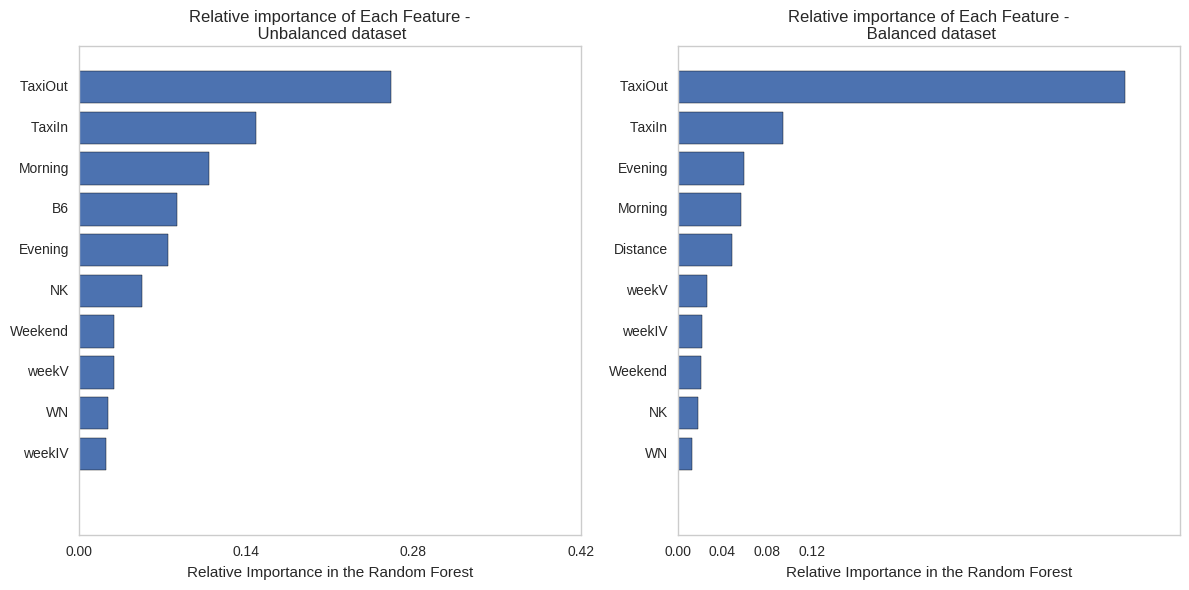

In [211]:
# Create plot of Top 10 significant factors using feature importances

import math
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6), tight_layout = True)
ax = axes.ravel() 
plt1 = ax[0]

importance_list = clfForest.feature_importances_
name_list = features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list) )[-10:])
plt1.barh(range(len(name_list)),importance_list,align='center')
plt1.set_yticks(range(len(name_list)))
plt1.set_yticklabels(name_list)
plt1.set_xticks([0, 0.14 ,0.28, 0.42])
plt1.set_xlabel('Relative Importance in the Random Forest')
plt1.set_title('Relative importance of Each Feature -\n Unbalanced dataset')
plt1.grid(False)


plt2 = ax[1]

importance_list = clfForest_balanced.feature_importances_
name_list = features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list) )[-10:])
plt2.barh(range(len(name_list)),importance_list,align='center')
plt2.set_yticks(range(len(name_list)))
plt2.set_yticklabels(name_list)
plt2.set_xticks([0, 0.04 ,0.08, 0.12])
plt2.set_xlabel('Relative Importance in the Random Forest')
plt2.set_title('Relative importance of Each Feature -\n Balanced dataset')
plt2.grid(False)

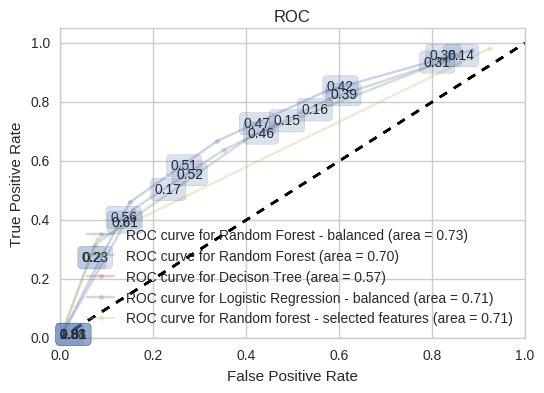

In [212]:
ax = make_roc("Random Forest - balanced",clfForest_balanced, ytest1, Xtest1, None, labe=3000, skip=4000)
make_roc("Random Forest",clfForest, ytest, Xtest, ax, labe=3000, skip=4000);
make_roc("Decison Tree", clfdt, ytest, Xtest, None, labe=3000, skip=4000)
make_roc("Logistic Regression - balanced", clflog_balanced, y_test1, X_test1, None, labe=3000, skip=4000)
make_roc("Random forest - selected features", pipeline_rf, y_test, X_test, None, labe=3000, skip=4000)

The relative feature importance chart above suggests that balancing the proportions improved the prediction of true arrival delays. These features seem to be the promising seperators between arrival delays and no arrival delays